##  **Prediction using supervised machine learning**
In this notebook we will see how to use python to implement machine learning models
and we will use simple linear regression model
### **Simple linear regression model**
We will use a simple linear regression model to predict students scores based on the number of hours they have studied

In [1]:
#Import main libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data...

In [2]:
#Load data
url = "http://bit.ly/w-data"
score_df = pd.read_csv(url)

## Explore data

In [3]:
score_df.head() #print first 5 rows 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
score_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
score_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#print correlation between hours of study and scores
score_df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Data Visualization

In [8]:
plt.style.use('seaborn-darkgrid')

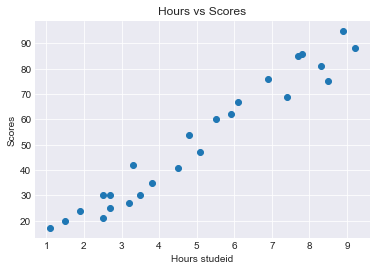

In [9]:
#using scatter plot to visualize data and see relation between data
plt.scatter(score_df['Hours'], score_df['Scores'])
plt.title("Hours vs Scores")
plt.xlabel("Hours studeid")
plt.ylabel("Scores")
plt.show()

From graph above we see positive linear relationship between study hours and scores

## Data preprocessing

In [10]:
#Divide data to inputs(X) and outputs(y)
X = score_df.iloc[:,:-1].values
y = score_df.iloc[:,1].values

In [11]:
#import train_test_split to split input and output data
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Using linear regression model

In [13]:
#import Linearregression algorithm to train data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
#create line using linear regression line equation Y = theta0 + theta1*x 
line = model.coef_*X + model.intercept_

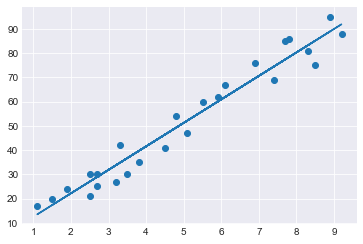

In [15]:
plt.scatter(X, y)
plt.plot(X,line)
plt.show()

In [16]:
y_pred = model.predict(X_test)

In [17]:
#Compare between actual data and predicted data
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df.head()

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


## Evalutae Error

In [18]:
#Import mean_squared_error to evaluate error
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [19]:
#using root mean square error and mean absolute error to evaluate performance
print("Root square error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean absolute error:",mean_absolute_error(y_test, y_pred))

Root square error: 4.352380006653288
Mean absolute error: 3.9207511902099244


## predict our own data

In [20]:
studied_hours = 9.25
model.predict(np.array(studied_hours).reshape(-1,1))[0]

92.38611528261494